In [77]:
import numpy as np
import pandas as pd
import glob
import json
import os
import sys
import urllib.request
import requests
from bs4 import BeautifulSoup
import time
from selenium import webdriver
import datetime as dt
import pymysql

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# dowjones's db to DataFrame

def selectDJ() : 
    tmp_df = pd.DataFrame([])
    
    tmp_date = np.array([])
    tmp_close = np.array([])
    tmp_open = np.array([])
    tmp_high = np.array([])
    tmp_low = np.array([])
    tmp_volume = np.array([])
    
    conn = pymysql.connect(host='localhost', port=3306,
                           user='acorn12', passwd='acorn12', db='acorn', charset='utf8')
    try:
        with conn.cursor() as cursor:
            sql = 'SELECT dj_date, dj_close, dj_open, dj_high, dj_low, dj_volume FROM dowjones '

            cursor.execute(sql)
            conn.commit()

            rows = cursor.fetchall()
            
            for i in range(len(rows)) :
                tmp_date = np.append(tmp_date, rows[i][0])
                tmp_close = np.append(tmp_close, rows[i][1])
                tmp_open = np.append(tmp_open, rows[i][2])
                tmp_high = np.append(tmp_high, rows[i][3])
                tmp_low = np.append(tmp_low, rows[i][4])
                tmp_volume = np.append(tmp_volume, rows[i][5])
                
    finally:
        conn.close()
    
    tmp_df['date'] = tmp_date
    tmp_df['close'] = tmp_close
    tmp_df['open'] = tmp_open
    tmp_df['high'] = tmp_high
    tmp_df['low'] = tmp_low
    tmp_df['volume'] = tmp_volume
    
    tmp_df = tmp_df.set_index('date')
    
    return(tmp_df)

In [4]:
# gold's db to DataFrame

def selectGold() : 
    tmp_df = pd.DataFrame([])
    
    tmp_date = np.array([])
    tmp_close = np.array([])
    tmp_open = np.array([])
    tmp_high = np.array([])
    tmp_low = np.array([])
    tmp_volume = np.array([])
    
    conn = pymysql.connect(host='localhost', port=3306,
                           user='acorn12', passwd='acorn12', db='acorn', charset='utf8')
    try:
        with conn.cursor() as cursor:
            sql = 'SELECT gold_date, gold_close, gold_open, gold_high, gold_low, gold_volume '
            sql += 'FROM gold '

            cursor.execute(sql)
            conn.commit()

            rows = cursor.fetchall()
            
            for i in range(len(rows)) :
                tmp_date = np.append(tmp_date, rows[i][0])
                tmp_close = np.append(tmp_close, rows[i][1])
                tmp_open = np.append(tmp_open, rows[i][2])
                tmp_high = np.append(tmp_high, rows[i][3])
                tmp_low = np.append(tmp_low, rows[i][4])
                tmp_volume = np.append(tmp_volume, rows[i][5])
                
    finally:
        conn.close()
    
    tmp_df['date'] = tmp_date
    tmp_df['close'] = tmp_close
    tmp_df['open'] = tmp_open
    tmp_df['high'] = tmp_high
    tmp_df['low'] = tmp_low
    tmp_df['volume'] = tmp_volume
    
    tmp_df = tmp_df.set_index('date')
    
    return(tmp_df)

In [5]:
# bitcoin's db to DataFrame

def selectBitcoin() : 
    tmp_df = pd.DataFrame([])
    
    tmp_date = np.array([])
    tmp_close = np.array([])
    tmp_open = np.array([])
    tmp_high = np.array([])
    tmp_low = np.array([])
    tmp_volume = np.array([])
    
    conn = pymysql.connect(host='localhost', port=3306,
                           user='acorn12', passwd='acorn12', db='acorn', charset='utf8')
    try:
        with conn.cursor() as cursor:
            sql = 'SELECT bit_date, bit_close, bit_open, bit_high, bit_low, bit_volume '
            sql += 'FROM bitcoin '

            cursor.execute(sql)
            conn.commit()

            rows = cursor.fetchall()
            
            for i in range(len(rows)) :
                tmp_date = np.append(tmp_date, rows[i][0])
                tmp_close = np.append(tmp_close, rows[i][1])
                tmp_open = np.append(tmp_open, rows[i][2])
                tmp_high = np.append(tmp_high, rows[i][3])
                tmp_low = np.append(tmp_low, rows[i][4])
                tmp_volume = np.append(tmp_volume, rows[i][5])
                
    finally:
        conn.close()
    
    tmp_df['date'] = tmp_date
    tmp_df['close'] = tmp_close
    tmp_df['open'] = tmp_open
    tmp_df['high'] = tmp_high
    tmp_df['low'] = tmp_low
    tmp_df['volume'] = tmp_volume
    
    tmp_df = tmp_df.set_index('date')
    
    return(tmp_df)

NameError: name 'tmp_df' is not defined

In [6]:
# get all Data in db

dowjones_DF = selectDJ()
gold_DF = selectGold()
bitcoin_DF = selectBitcoin()

In [7]:
dowjones_subDF = dowjones_DF.loc[:,['close','open']]
gold_subDF = gold_DF.loc[:,['close','open']]
bitcoin_subDF = bitcoin_DF.loc[:,['close','open']]

In [8]:
dowjones_subDF = dowjones_subDF.add_prefix('dj_')
gold_subDF = gold_subDF.add_prefix('gol_')
bitcoin_subDF = bitcoin_subDF.add_prefix('bit_')

In [8]:
bitcoin_DF

,close,open,high,low,volume
date,,,,,
2013-01-02,13.28,13.28,13.28,13.28,0.0
2013-01-03,13.40,13.40,13.40,13.40,0.0
2013-01-04,13.50,13.50,13.50,13.50,0.0
2013-01-05,13.44,13.44,13.44,13.44,0.0
2013-01-06,13.45,13.45,13.45,13.45,0.0
...,...,...,...,...,...
2020-01-18,8891.50,8873.10,8965.00,8794.23,3460.0
2020-01-19,8694.00,8891.60,9169.50,8455.70,12410.0
2020-01-20,8667.44,8698.60,8720.00,8630.00,9260.0


In [14]:
result = pd.concat([dowjones_DF,gold_DF,bitcoin_DF], axis=1, sort=False)

In [9]:
result_sub = pd.concat([bitcoin_subDF, gold_subDF, dowjones_subDF], axis = 1, sort=False)

In [10]:
result_sub

,bit_close,bit_open,gol_close,gol_open,dj_close,dj_open
2013-01-02,13.28,13.28,1687.9,1672.8,13412.55,13104.30
2013-01-03,13.40,13.40,1673.7,1686.1,13391.36,13413.01
2013-01-04,13.50,13.50,1648.1,1647.0,13435.21,13391.05
2013-01-05,13.44,13.44,NaN,NaN,NaN,NaN
2013-01-06,13.45,13.45,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2016-11-07,NaN,NaN,1326.8,1326.8,18259.60,17994.64
2016-11-08,NaN,NaN,1322.6,1322.6,18332.74,18251.38
2016-11-09,NaN,NaN,1322.1,1319.0,18589.69,18317.26
2016-11-10,NaN,NaN,1313.0,1313.0,18807.88,18603.14


In [10]:
result

,close,open,high,low,volume,close,open,high,low,volume,close,open,high,low,volume
2013-01-02,13412.55,13104.30,13412.71,13104.30,161430000.0,1687.9,1672.8,1693.8,1670.0,40.0,13.28,13.28,13.28,13.28,0.0
2013-01-03,13391.36,13413.01,13430.60,13358.30,129630000.0,1673.7,1686.1,1686.8,1662.0,140.0,13.40,13.40,13.40,13.40,0.0
2013-01-04,13435.21,13391.05,13447.11,13376.23,107590000.0,1648.1,1647.0,1658.3,1625.7,200.0,13.50,13.50,13.50,13.50,0.0
2013-01-07,13384.29,13436.13,13436.13,13343.32,113120000.0,1645.5,1656.5,1659.9,1643.8,50.0,13.59,13.59,13.59,13.59,0.0
2013-01-08,13328.85,13377.42,13377.42,13293.13,129570000.0,1661.5,1647.7,1659.5,1647.7,20.0,13.74,13.74,13.74,13.74,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7369.83,7371.80,7422.00,7297.70,4270.0
2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7364.60,7370.30,7509.90,7315.80,4450.0
2020-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8013.80,8184.30,8271.90,7994.60,4250.0
2020-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8174.70,8013.63,8174.70,7951.70,3210.0


In [15]:
result.dropna()

,close,open,high,low,volume,close,open,high,low,volume,close,open,high,low,volume
2013-01-02,13412.55,13104.30,13412.71,13104.30,161430000.0,1687.9,1672.8,1693.8,1670.0,40.0,13.28,13.28,13.28,13.28,0.0
2013-01-03,13391.36,13413.01,13430.60,13358.30,129630000.0,1673.7,1686.1,1686.8,1662.0,140.0,13.40,13.40,13.40,13.40,0.0
2013-01-04,13435.21,13391.05,13447.11,13376.23,107590000.0,1648.1,1647.0,1658.3,1625.7,200.0,13.50,13.50,13.50,13.50,0.0
2013-01-07,13384.29,13436.13,13436.13,13343.32,113120000.0,1645.5,1656.5,1659.9,1643.8,50.0,13.59,13.59,13.59,13.59,0.0
2013-01-08,13328.85,13377.42,13377.42,13293.13,129570000.0,1661.5,1647.7,1659.5,1647.7,20.0,13.74,13.74,13.74,13.74,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-14,28939.67,28895.50,29054.16,28872.27,296040000.0,1544.6,1548.6,1549.5,1536.4,340910.0,8775.60,8104.10,8829.00,8099.30,16570.0
2020-01-15,29030.22,28901.80,29127.59,28897.35,263430000.0,1554.0,1546.8,1558.8,1546.5,310070.0,8807.70,8760.84,8873.00,8560.20,8780.0
2020-01-16,29297.64,29131.95,29300.32,29131.95,252110000.0,1550.5,1556.6,1558.2,1548.0,260050.0,8720.60,8810.90,8839.90,8579.80,5310.0
2020-01-17,29348.10,29313.31,29373.62,29289.91,336870000.0,1560.3,1553.0,1561.4,1549.3,264930.0,8875.40,8719.55,8994.90,8674.20,9690.0


In [21]:
result_sub_drop = result_sub.dropna()

In [22]:
# 데이터를 한데모으고 이에 대해 빈값은 지워버렸음 0은 살리고, NaN 값만 지움

# 그리고 suffix,prefix 로 값을 넣어주는 형태로 해결해야함 : 완료
# 이와같이하면 안되고 peding 처리를 해야함 NaN 값에 대해서 전 값을 똑같이 집어넣어준다

result_sub_drop

,close,open,close,open,close,open
2013-01-02,13.28,13.28,1687.9,1672.8,13412.55,13104.30
2013-01-03,13.40,13.40,1673.7,1686.1,13391.36,13413.01
2013-01-04,13.50,13.50,1648.1,1647.0,13435.21,13391.05
2013-01-07,13.59,13.59,1645.5,1656.5,13384.29,13436.13
2013-01-08,13.74,13.74,1661.5,1647.7,13328.85,13377.42
...,...,...,...,...,...,...
2020-01-14,8775.60,8104.10,1544.6,1548.6,28939.67,28895.50
2020-01-15,8807.70,8760.84,1554.0,1546.8,29030.22,28901.80
2020-01-16,8720.60,8810.90,1550.5,1556.6,29297.64,29131.95
2020-01-17,8875.40,8719.55,1560.3,1553.0,29348.10,29313.31


In [40]:
result_sub = result_sub.sort_index(axis=0)

In [100]:
np.isnan(result_sub.loc[result_sub.index[4],'gol_close'])

True

In [124]:
result_sub.loc[:,'gol_close'].isnull()

2013-01-02    False
2013-01-03    False
2013-01-04    False
2013-01-05     True
2013-01-06     True
              ...  
2020-01-18     True
2020-01-19    False
2020-01-20    False
2020-01-21    False
2020-01-22    False
Name: gol_close, Length: 2570, dtype: bool

In [26]:
# na 값에 대해서 padding 처리한 과정 : 값이 없으면 전날 데이터 기준으로 들어간다

beforeDate = result_sub.index[0]

for date in result_sub.index :
    for cols in result_sub.columns :
        if pd.isnull(result_sub.at[date,cols]) == True :
            result_sub.at[date,cols] = result_sub.at[beforeDate,cols]
    beforeDate = date
    

In [36]:
# padding 안된값있는지 확인
for cols in result_sub.columns :
    print(result_sub.loc[:,cols].isnull().value_counts())

False    2570
Name: bit_close, dtype: int64
False    2570
Name: bit_open, dtype: int64
False    2570
Name: gol_close, dtype: int64
False    2570
Name: gol_open, dtype: int64
False    2570
Name: dj_close, dtype: int64
False    2570
Name: dj_open, dtype: int64


In [41]:
result_sub

,bit_close,bit_open,gol_close,gol_open,dj_close,dj_open
2013-01-02,13.28,13.28,1687.90,1672.80,13412.55,13104.30
2013-01-03,13.40,13.40,1673.70,1686.10,13391.36,13413.01
2013-01-04,13.50,13.50,1648.10,1647.00,13435.21,13391.05
2013-01-05,13.44,13.44,1648.10,1647.00,13435.21,13391.05
2013-01-06,13.45,13.45,1648.10,1647.00,13435.21,13391.05
...,...,...,...,...,...,...
2020-01-18,8891.50,8873.10,1560.30,1553.00,29348.10,29313.31
2020-01-19,8694.00,8891.60,1557.05,1557.40,29348.10,29313.31
2020-01-20,8667.44,8698.60,1562.05,1557.20,29348.10,29313.31
2020-01-21,8734.10,8638.20,1557.90,1557.30,29196.04,29269.05


In [106]:
result_sub.index

Index([2013-01-02, 2013-01-03, 2013-01-04, 2013-01-05, 2013-01-06, 2013-01-07,
       2013-01-08, 2013-01-09, 2013-01-10, 2013-01-11,
       ...
       2020-01-13, 2020-01-14, 2020-01-15, 2020-01-16, 2020-01-17, 2020-01-18,
       2020-01-19, 2020-01-20, 2020-01-21, 2020-01-22],
      dtype='object', length=2570)

In [44]:
result_new = result_sub.iloc[1500:,:]

In [84]:
beforeYear= dt.datetime.now().date().replace(year=dt.datetime.now().year-2)
beforeYear

datetime.date(2018, 1, 23)

In [85]:
result_new = result_sub.loc[beforeYear:,:]

In [52]:
result_new = result_sub.loc[dt.datetime(2017,1,1).date():,:]

In [68]:
result_new

,bit_close,bit_open,gol_close,gol_open,dj_close,dj_open
2017-01-23,910.03,923.72,1276.60,1276.60,19799.85,19794.79
2017-01-24,886.10,908.41,1271.80,1271.80,19912.71,19794.68
2017-01-25,893.35,886.10,1258.80,1258.80,20068.51,19994.48
2017-01-26,915.12,893.35,1250.60,1250.60,20100.91,20076.25
2017-01-27,916.70,915.12,1249.40,1246.00,20093.78,20103.36
...,...,...,...,...,...,...
2020-01-18,8891.50,8873.10,1560.30,1553.00,29348.10,29313.31
2020-01-19,8694.00,8891.60,1557.05,1557.40,29348.10,29313.31
2020-01-20,8667.44,8698.60,1562.05,1557.20,29348.10,29313.31
2020-01-21,8734.10,8638.20,1557.90,1557.30,29196.04,29269.05


In [38]:
corr = result_sub.corr(method='pearson')

In [42]:
print(corr)

           bit_close  bit_open  gol_close  gol_open  dj_close   dj_open
bit_close   1.000000  0.997921   0.155366  0.151367  0.859006  0.858649
bit_open    0.997921  1.000000   0.156011  0.151958  0.859045  0.858751
gol_close   0.155366  0.156011   1.000000  0.998173 -0.022841 -0.024420
gol_open    0.151367  0.151958   0.998173  1.000000 -0.027844 -0.029507
dj_close    0.859006  0.859045  -0.022841 -0.027844  1.000000  0.999381
dj_open     0.858649  0.858751  -0.024420 -0.029507  0.999381  1.000000


In [57]:
corr.iat[0,0]

1.0

In [ ]:
# bit_close와 dj_close는 의외로 노은 상관관계를 가지고 있음을 알수 있다.

In [69]:
print(result_new.corr(method='pearson'))

           bit_close  bit_open  gol_close  gol_open  dj_close   dj_open
bit_close   1.000000  0.994118   0.473515  0.472763  0.646654  0.646566
bit_open    0.994118  1.000000   0.474936  0.473990  0.648785  0.649023
gol_close   0.473515  0.474936   1.000000  0.996531  0.521949  0.521530
gol_open    0.472763  0.473990   0.996531  1.000000  0.520399  0.519283
dj_close    0.646654  0.648785   0.521949  0.520399  1.000000  0.997060
dj_open     0.646566  0.649023   0.521530  0.519283  0.997060  1.000000


In [86]:
method = ['pearson', 'kendall', 'spearman']

for m in method :
    print('\n' + m + '\n')
    print(result_new.corr(method=m))


pearson

           bit_close  bit_open  gol_close  gol_open  dj_close   dj_open
bit_close   1.000000  0.990211   0.585097  0.585971  0.339856  0.343023
bit_open    0.990211  1.000000   0.584458  0.585529  0.337016  0.340895
gol_close   0.585097  0.584458   1.000000  0.996283  0.557282  0.559288
gol_open    0.585971  0.585529   0.996283  1.000000  0.558231  0.558759
dj_close    0.339856  0.337016   0.557282  0.558231  1.000000  0.987855
dj_open     0.343023  0.340895   0.559288  0.558759  0.987855  1.000000

kendall

           bit_close  bit_open  gol_close  gol_open  dj_close   dj_open
bit_close   1.000000  0.914665   0.399998  0.399366  0.218073  0.219941
bit_open    0.914665  1.000000   0.398881  0.397895  0.215474  0.217734
gol_close   0.399998  0.398881   1.000000  0.946064  0.276582  0.276789
gol_open    0.399366  0.397895   0.946064  1.000000  0.277955  0.278350
dj_close    0.218073  0.215474   0.276582  0.277955  1.000000  0.908463
dj_open     0.219941  0.217734   0.276789  0

(6.0, 0.0)

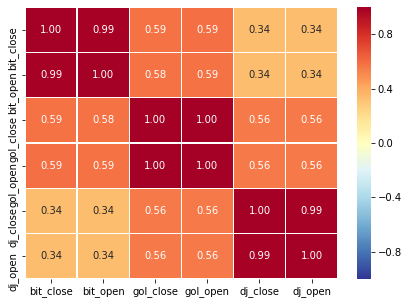

In [100]:
plt.figure(figsize = (7,5))
hm = sns.heatmap(data=result_new.corr(method='pearson'), annot=True, fmt = '.2f', linewidths = .5,
            cmap='RdYlBu_r', vmin = -1, vmax = 1)
# 위 아래 0.5씩 더 줘서 꼬이는게 없어지게 하는 경우
bottom, top = hm.get_ylim()
hm.set_ylim(bottom + 0.5, top - 0.5)

(6.0, 0.0)

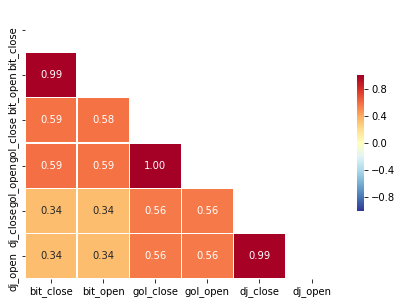

In [98]:
# 그림 사이즈 지정
fig, ax = plt.subplots(figsize=(7,5))

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래삼각형에 False)

mask = np.zeros_like(result_new.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

hm = sns.heatmap(data=result_new.corr(), annot=True, fmt = '.2f', linewidths = .5,
            mask=mask, cbar_kws={'shrink':.5},
            cmap='RdYlBu_r', vmin = -1, vmax = 1)

bottom, top = hm.get_ylim()
hm.set_ylim(bottom + 0.5, top - 0.5)

In [97]:
hm.get_ylim()

(5.5, 0.5)

In [65]:
result_sub.index[0]

datetime.date(2013, 1, 2)

In [ ]:
beforeYear= dt.datetime.now().date().replace(year=dt.datetime.now().year-2)
beforeYear